# DiscountMate – Time Sensitive Deal Prediction

## 1. Project Overview
**DiscountMate** is a smart system designed to help consumers identify the best supermarket deals by analyzing price patterns, discount strategies, and seasonal effects across multiple chains.  
The project builds a **synthetic dataset** and develops **machine learning models** to predict if an item will be discounted in the next 7 days.

---

## 2. Goals
- Generated a realistic **supermarket pricing dataset**.
- Built predictive ML pipelines for **discount forecasting**.
- Handled **class imbalance** using oversampling (SMOTE) and class weights.
- Evaluated models using **F1 score, AUC, and threshold optimization**.
- Provided visual insights into discount patterns and model performance.

---

## 3. Dataset Creation
- Synthetic dataset simulates **2 years of daily supermarket pricing**.
- Includes:
  - Chains: e.g., Woolworths, Coles, Aldi.
  - Categories & subcategories (fruits, dairy, snacks, etc.).
  - Base prices adjusted by **seasonal multipliers**.
  - Discounts influenced by **day, chain, month, and product type**.
- Saves data into `discount_mate_dataset.csv`.

---

## 4. Machine Learning Pipeline
1. **Data Preprocessing**
   - Handle missing values, encode categoricals, create derived features.
2. **Feature Engineering**
   - Time-based (day of month, holidays, peak discount days).  
   - Price-based (volatility, relative price levels).  
   - Discount history patterns.
3. **Class Balancing**
   - SMOTE oversampling.  
   - Class-weighted models.
4. **Model Training**
   - Random Forest, Gradient Boosting, Logistic Regression.  
   - Hyperparameter tuning with `GridSearchCV`.  
   - Time-aware splits (`TimeSeriesSplit`).
5. **Evaluation**
   - AUC, precision, recall, F1.  
   - Threshold optimization via precision-recall analysis.
6. **Model Persistence**
   - Save best model with preprocessing steps into `balanced_discount_predictor.pkl`.

---

## 5. Expected Outputs
- **Data file**: `discount_mate_dataset.csv`  
- **Model file**: `balanced_discount_predictor.pkl`  
- **Performance report**: `balanced_model_performance.png` (plots + metrics)  
- **Logs**: Console output showing training/evaluation summaries  

---

## 6. Why It Matters
DiscountMate provides a **realistic testing ground** for:
- Analyzing discount strategies across retailers.
- Predicting future promotions with higher accuracy.
- Helping customers maximize savings by forecasting the **best shopping times**.


# DiscountMate – Subcategory Extraction  

## What the Code Does  

1. **Load the Dataset**  
   - Reads the Coles dataset (`coles (2).csv`) into a Pandas DataFrame.  

2. **Extract Unique Subcategories**  
   - Retrieves all unique values from the `subcat` column.  
   - Converts them into strings while ignoring missing (`NaN`) values.  

3. **Handle Missing Values**  
   - Counts how many subcategories are missing (`NaN`).  
   - Reports both valid subcategories and total including missing.  

4. **Display Results**  
   - Prints a sorted, numbered list of all valid subcategories.  
   - Shows summary statistics about how many categories were found.  

5. **Save Results to File**  
   - Writes the list of unique subcategories into `unique_subcategories.txt`.  
   - Includes notes on missing values and category counts for reference.  

6. **Data Quality Checks**  
   - Reports the number of null entries in the `subcat` column.  
   - Prints dataset shape and column names for a quick overview.  

---

In short: The code **discovers, cleans, reports, and saves all product subcategories** in the Coles dataset, while also checking for missing values to keep the data reliable for further analysis in DiscountMate.


In [7]:
import pandas as pd
import numpy as np

# Load your Coles dataset
# Replace 'your_coles_dataset.csv' with the actual filename
df = pd.read_csv('coles (2).csv')

# Get unique subcategories and handle NaN values
unique_subcategories = df['subcat'].unique()

# Filter out NaN values and convert to strings
valid_subcategories = [str(subcat) for subcat in unique_subcategories if pd.notna(subcat)]
nan_count = len(unique_subcategories) - len(valid_subcategories)

# Print the unique values
print("Unique subcategories:")
print("=" * 50)
for i, subcat in enumerate(sorted(valid_subcategories), 1):
    print(f"{i:3d}. {subcat}")

if nan_count > 0:
    print(f"\nNote: Found {nan_count} NaN/missing values in subcategories")

print(f"\nTotal valid subcategories: {len(valid_subcategories)}")
print(f"Total including NaN: {len(unique_subcategories)}")

# Optional: Save to a text file for reference
with open('unique_subcategories.txt', 'w') as f:
    f.write("Unique Subcategories from Coles Dataset\n")
    f.write("=" * 50 + "\n")
    for i, subcat in enumerate(sorted(valid_subcategories), 1):
        f.write(f"{i:3d}. {subcat}\n")
    if nan_count > 0:
        f.write(f"\nNote: Found {nan_count} NaN/missing values\n")
    f.write(f"\nTotal valid subcategories: {len(valid_subcategories)}")
    f.write(f"\nTotal including NaN: {len(unique_subcategories)}")

print("\nUnique subcategories also saved to 'unique_subcategories.txt'")

# Optional: Check for any null/missing values in subcat column
null_count = df['subcat'].isnull().sum()
if null_count > 0:
    print(f"\nWarning: Found {null_count} null values in 'subcat' column")

# Optional: Show data types and basic info
print(f"\nDataset info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Unique subcategories:
  1. Air Care & Pest Control
  2. Alcoholic Beverages (Low/No Alc)
  3. Antipasto/Olives/Pickles
  4. Bacon
  5. Bags, Wraps & Foils
  6. Bakery
  7. Baking Ingredients
  8. Baking Mixes
  9. Beauty, Wellness & First Aid
 10. Beef
 11. Beef (Processed/Cooked)
 12. Beverages (Shelf-Stable)
 13. Biscuits & Cookies
 14. Bread Loaves
 15. Breakfast Cereals
 16. Butter Specialty
 17. Butter Standard
 18. Cakes & Slices
 19. Canned Goods
 20. Cheese
 21. Cheese Specialty
 22. Cheese Standard
 23. Chicken
 24. Chicken (Processed/Cooked)
 25. Chiken
 26. Cleaning Solutions & Wipes
 27. Cleaning Tools & Accessories
 28. Coffee
 29. Crab
 30. Crackers/Breadsticks
 31. Cream Standard
 32. Deodorants & Antiperspirants
 33. Deodorants & Body Sprays
 34. Dips/Pate
 35. Dishwashing
 36. Duck
 37. Eggs Standard
 38. Feminine & Incontinence Care
 39. First Aid & Wellness
 40. First Aid & Wellness Accessories
 41. Fish
 42. Frankfurts/Sausages
 43. Frozen Chips
 44. Frozen Desserts

# DiscountMate – Synthetic Data Generator  

## Purpose  
This script creates a **realistic supermarket pricing dataset** for DiscountMate.  
It simulates day-by-day prices, discounts, and promotions across multiple chains, categories, and subcategories over two years.  

## Main Steps  
1. **Setup**  
   - Defines product categories, subcategories, supermarket chains, and base price ranges.  

2. **Seasonal & Discount Logic**  
   - Adjusts prices with seasonal multipliers (e.g., summer fruits, winter soups).  
   - Assigns discount probabilities depending on day, chain, month, and product type.  

3. **Data Generation**  
   - Iterates through each day, chain, category, and subcategory.  
   - Produces realistic product names, base prices, seasonal prices, and discounts.  
   - Rounds prices to the nearest 5 cents.  

4. **Feature Engineering**  
   - Adds rolling averages (7, 14, 30 days), discount frequency, and volatility.  
   - Creates predictive targets (e.g., will an item be discounted in 7 days?).  
   - Flags the cheapest option across chains for the same product.  

5. **Outputs**  
   - Saves all records to `discount_mate_dataset.csv`.  
   - Prints dataset summary: record counts, chains, categories, average prices, discount frequency, and chain-level stats.  

## Why It Matters  
The generated dataset gives DiscountMate a **realistic training ground** for testing pricing insights, discount detection, and prediction models without depending only on scraped live data.  


In [9]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

class DiscountMateDataGenerator:
    def __init__(self):
        # All 129 subcategories from your Coles data organized into 25 essential categories
        self.categories = {
            'Fresh Meat & Poultry': [
                'Beef', 'Chicken', 'Chiken', 'Pork', 'Lamb', 'Turkey', 'Duck', 
                'Veal', 'Kangaroo', 'Venison', 'Wallaby', 'Mixed Meat', 'Plant-Based'
            ],
            'Processed Meat & Deli': [
                'Bacon', 'Ham', 'Beef (Processed/Cooked)', 'Chicken (Processed/Cooked)',
                'Pork (Processed/Cooked)', 'Turkey (Processed/Cooked)', 'Frankfurts/Sausages',
                'Salami/Pepperoni/Chorizo', 'Other Deli', 'Platters/Kits'
            ],
            'Seafood': [
                'Fish', 'Salmon', 'Tuna', 'Trout', 'Prawns', 'Crab', 'Mussels',
                'Seafood', 'Seafood (Processed/Cooked)'
            ],
            'Dairy & Eggs': [
                'Milk Standard', 'Milk Specialty', 'Milk', 'Cheese Standard', 'Cheese Specialty',
                'Cheese', 'Butter Standard', 'Butter Specialty', 'Yoghurt Standard',
                'Yoghurt Specialty', 'Cream Standard', 'Eggs Standard'
            ],
            'Fresh Produce': [
                'Fruit', 'Vegetables (Fruiting)', 'Vegetables (Leafy/Salad)',
                'Vegetables (Root/Onion/Garlic)', 'Vegetables (Stem/Flower/Pod)',
                'Mushrooms', 'Herbs/Sprouts', 'Value-Added Produce', 'Other Items (F&V Section)'
            ],
            'Bakery': [
                'Bread Loaves', 'Rolls & Buns', 'Wraps & Flatbreads', 'Sourdough & Artisan Breads',
                'Cakes & Slices', 'Sweet Pastries & Donuts', 'Savoury Bakery Items',
                'Muffins & Cupcakes', 'Pancakes, Waffles & Crepes', 'Biscuits & Cookies', 'Bakery'
            ],
            'Pantry Staples': [
                'Pasta/Rice/Noodles/Grains', 'Canned Goods', 'Spreads/Oils/Condiments',
                'Breakfast Cereals', 'Baking Ingredients', 'Baking Mixes', 'Meal Kits/Bases/Instant Meals',
                'Meal Kits/Bases/Instant Meals5', 'Other Pantry Items', 'Pantry', 'Pantry/Other'
            ],
            'Beverages - Non-Alcoholic': [
                'Soft Drink/Mixer', 'Juice/Smoothie', 'Water', 'Coffee', 'Tea',
                'Functional/Health Drink', 'Other Drinks', 'Beverages (Shelf-Stable)', 'Non-Drink Item'
            ],
            'Alcoholic Beverages': [
                'Alcoholic Beverages (Low/No Alc)'
            ],
            'Snacks & Confectionery': [
                'Snacks (Sweet)', 'Snacks (Savoury)', 'Crackers/Breadsticks',
                'Nuts/Seeds/Dried Fruit', 'Antipasto/Olives/Pickles'
            ],
            'Frozen Foods': [
                'Frozen Meals', 'Ice Cream', 'Frozen Desserts', 'Frozen Vegetables',
                'Frozen Fruits', 'Frozen Meat', 'Frozen Poultry', 'Frozen Seafood',
                'Frozen Chips', 'Frozen Pastry', 'Other Frozen'
            ],
            'Health & Beauty': [
                'Vitamins & Supplements', 'Skincare', 'Hair Care', 'Oral Care',
                'First Aid & Wellness', 'Health & Medicines', 'Medicines & Health Treatments',
                'First Aid & Wellness Accessories', 'Beauty, Wellness & First Aid'
            ],
            'Personal Care': [
                'Deodorants & Antiperspirants', 'Deodorants & Body Sprays', 'Wash Products',
                'Shaving & Hair Removal', 'Shaving & Men\'s Grooming', 'Feminine & Incontinence Care'
            ],
            'Household Cleaning': [
                'Cleaning Solutions & Wipes', 'Dishwashing', 'Laundry Care',
                'Cleaning Tools & Accessories', 'Air Care & Pest Control'
            ],
            'Household Essentials': [
                'Paper Products', 'Bags, Wraps & Foils', 'Kitchenware & Food Storage',
                'Home Maintenance & General', 'Stationery'
            ],
            'Prepared Foods': [
                'Prepared Meals', 'Dips/Pate'
            ],
            # Additional categories to reach 25 (some single-item categories for completeness)
            'Outsider Items': ['Outsider']  # Catch-all category
        }
        
        # Major Australian supermarket chains
        self.supermarket_chains = ['Woolworths', 'Coles', 'IGA', 'ALDI', 'Foodland']
        
        # Realistic price ranges for each category (AUD)
        self.base_prices = {
            'Fresh Meat & Poultry': {'min': 6.50, 'max': 45.00},
            'Processed Meat & Deli': {'min': 4.50, 'max': 25.00},
            'Seafood': {'min': 8.00, 'max': 55.00},
            'Dairy & Eggs': {'min': 2.20, 'max': 15.00},
            'Fresh Produce': {'min': 1.50, 'max': 18.00},
            'Bakery': {'min': 2.00, 'max': 12.00},
            'Pantry Staples': {'min': 1.80, 'max': 15.00},
            'Beverages - Non-Alcoholic': {'min': 1.00, 'max': 8.50},
            'Alcoholic Beverages': {'min': 15.00, 'max': 65.00},
            'Snacks & Confectionery': {'min': 2.50, 'max': 12.00},
            'Frozen Foods': {'min': 3.00, 'max': 20.00},
            'Health & Beauty': {'min': 3.50, 'max': 35.00},
            'Personal Care': {'min': 2.80, 'max': 22.00},
            'Household Cleaning': {'min': 2.50, 'max': 18.00},
            'Household Essentials': {'min': 2.00, 'max': 25.00},
            'Prepared Foods': {'min': 3.50, 'max': 16.00},
            'Outsider Items': {'min': 5.00, 'max': 30.00}
        }

    def generate_seasonal_multiplier(self, date, category, subcategory):
        """Generate seasonal price multipliers based on Australian seasons"""
        month = date.month
        
        # Summer (Dec-Feb): Higher demand for certain products
        if month in [12, 1, 2]:
            if category == 'Fresh Produce':
                return np.random.uniform(1.15, 1.45)  # Summer produce premium
            elif category == 'Beverages - Non-Alcoholic':
                return np.random.uniform(1.05, 1.25)  # Higher beverage demand
            elif category == 'Frozen Foods' and 'Ice Cream' in subcategory:
                return np.random.uniform(1.20, 1.40)  # Ice cream peak season
            elif category == 'Alcoholic Beverages':
                return np.random.uniform(1.10, 1.25)  # Holiday season
                
        # Autumn (Mar-May): Stable pricing
        elif month in [3, 4, 5]:
            return np.random.uniform(0.95, 1.05)
            
        # Winter (Jun-Aug): Different demand patterns
        elif month in [6, 7, 8]:
            if category == 'Fresh Produce':
                return np.random.uniform(0.90, 1.10)  # Some produce cheaper
            elif 'Soup' in subcategory or 'Hot' in subcategory:
                return np.random.uniform(1.05, 1.20)
            elif category == 'Frozen Foods' and 'Ice Cream' in subcategory:
                return np.random.uniform(0.80, 0.95)  # Ice cream low season
                
        # Spring (Sep-Nov): Back to school/preparation season
        elif month in [9, 10, 11]:
            if category == 'Household Essentials':
                return np.random.uniform(1.02, 1.15)  # Spring cleaning
            elif category == 'Fresh Produce':
                return np.random.uniform(0.85, 1.15)  # Spring produce variety
        
        # Christmas premium (December)
        if month == 12:
            if category in ['Fresh Meat & Poultry', 'Seafood', 'Processed Meat & Deli']:
                return np.random.uniform(1.25, 1.60)  # Christmas premium
            elif category == 'Bakery':
                return np.random.uniform(1.15, 1.35)  # Holiday baking
        
        return np.random.uniform(0.96, 1.04)

    def generate_discount_probability(self, date, category, subcategory, chain):
        """Generate probability of discount based on various factors"""
        base_prob = 0.18  # 18% base discount probability
        
        # Day of week effects
        if date.weekday() == 2:  # Wednesday - traditional sale day
            base_prob += 0.12
        elif date.weekday() >= 5:  # Weekend
            base_prob += 0.08
        elif date.weekday() == 0:  # Monday - new week promotions
            base_prob += 0.05
        
        # Month patterns
        if date.day >= 28:  # End of month clearance
            base_prob += 0.10
        elif 15 <= date.day <= 21:  # Mid-month promotions
            base_prob += 0.05
        
        # Chain-specific discount strategies
        chain_multipliers = {
            'ALDI': 0.6,      # ALDI has fewer discounts but lower base prices
            'Woolworths': 1.3,  # Aggressive promotional strategy
            'Coles': 1.2,      # Strong promotional activity
            'IGA': 0.8,        # Fewer promotions, local focus
            'Foodland': 0.75   # Regional chain, moderate promotions
        }
        base_prob *= chain_multipliers.get(chain, 1.0)
        
        # Category-specific discount patterns
        category_multipliers = {
            'Fresh Produce': 1.4,        # High spoilage, frequent discounts
            'Bakery': 1.3,              # Daily markdowns
            'Fresh Meat & Poultry': 1.2, # Regular promotions
            'Dairy & Eggs': 1.1,        # Moderate promotions
            'Health & Beauty': 1.3,     # Regular promotional category
            'Household Cleaning': 1.2,   # Regular promotions
            'Snacks & Confectionery': 1.25, # Impulse category with promotions
            'Frozen Foods': 1.15,       # Moderate discount frequency
            'Pantry Staples': 1.0,      # Stable pricing
            'Beverages - Non-Alcoholic': 1.1, # Regular promotions
            'Alcoholic Beverages': 0.9,  # Less frequent discounts
            'Personal Care': 1.2,       # Regular promotions
            'Household Essentials': 1.1, # Moderate promotions
            'Prepared Foods': 1.35,     # Short shelf life
            'Processed Meat & Deli': 1.25, # Regular promotions
            'Seafood': 1.3,             # Perishable, frequent promotions
            'Outsider Items': 0.8       # Miscellaneous items
        }
        
        base_prob *= category_multipliers.get(category, 1.0)
        
        # Seasonal discount adjustments
        month = date.month
        if month in [1, 7]:  # January and July - traditional sale months
            base_prob += 0.15
        elif month == 12:  # December - holiday promotions
            base_prob += 0.10
        elif month in [3, 6, 9]:  # Quarterly promotions
            base_prob += 0.08
        
        return min(base_prob, 0.55)  # Cap at 55% probability

    def generate_product_name(self, subcategory):
        """Generate realistic product names for each subcategory"""
        product_names = {
            'Beef': ['Premium Beef Mince 500g', 'Beef Scotch Fillet 300g', 'Beef Chuck Steak 400g', 'Beef Eye Fillet 250g'],
            'Chicken': ['RSPCA Chicken Breast 500g', 'Whole Chicken 1.6kg', 'Chicken Thigh Fillets 750g', 'Chicken Wings 1kg'],
            'Milk Standard': ['Full Cream Milk 2L', 'Skim Milk 1L', 'Lactose Free Milk 1L', 'Organic Milk 1L'],
            'Bread Loaves': ['Tip Top White Bread 700g', 'Helga\'s Wholemeal 750g', 'Wonder White 650g', 'Baker\'s Delight Sourdough'],
            'Bananas': ['Cavendish Bananas 1kg', 'Organic Bananas 750g', 'Lady Finger Bananas 500g'],
            'Soft Drink/Mixer': ['Coca Cola 1.25L', 'Pepsi Max 2L', 'Schweppes Lemonade 1L', 'Sprite 600ml'],
            'Ice Cream': ['Streets Blue Ribbon 2L', 'Connoisseur Vanilla 1L', 'Ben & Jerry\'s 458ml', 'Peters Drumstick 4pk'],
            'Cleaning Solutions & Wipes': ['Pine O Cleen 1.25L', 'Ajax Spray 500ml', 'Chux Wipes 40pk', 'Glen 20 300ml']
        }
        
        if subcategory in product_names:
            return random.choice(product_names[subcategory])
        else:
            # Generate generic product name
            weights = ['250g', '500g', '750g', '1kg', '1L', '2L', '300ml', '500ml', '1.25L', 
                      '4pk', '6pk', '12pk', '200g', '400g', '600g', '800g', '1.5kg', '2kg']
            weight = random.choice(weights)
            return f"{subcategory} Product {weight}"

    def generate_price_data(self, start_date, end_date):
        """Generate comprehensive price data for all subcategories"""
        data = []
        current_date = start_date
        
        # Create stable base prices for each product to maintain consistency
        product_base_prices = {}
        
        print(f"Generating data from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
        total_days = (end_date - start_date).days + 1
        
        day_count = 0
        while current_date <= end_date:
            day_count += 1
            if day_count % 30 == 0:  # Progress update every 30 days
                print(f"Processing day {day_count}/{total_days} ({current_date.strftime('%Y-%m-%d')})")
            
            for chain in self.supermarket_chains:
                for category, subcategories in self.categories.items():
                    for subcategory in subcategories:
                        # Create unique product identifier
                        product_key = (category, subcategory, chain)
                        
                        # Generate or retrieve base price
                        if product_key not in product_base_prices:
                            price_range = self.base_prices[category]
                            base_price = np.random.uniform(price_range['min'], price_range['max'])
                            product_base_prices[product_key] = base_price
                        
                        base_price = product_base_prices[product_key]
                        
                        # Apply chain-specific pricing adjustments
                        chain_multipliers = {
                            'ALDI': 0.82,     # ALDI consistently cheaper
                            'Woolworths': 1.01, # Slight premium
                            'Coles': 1.00,    # Baseline
                            'IGA': 1.12,      # Premium for convenience
                            'Foodland': 1.08  # Regional premium
                        }
                        
                        adjusted_price = base_price * chain_multipliers[chain]
                        
                        # Apply seasonal multiplier
                        seasonal_multiplier = self.generate_seasonal_multiplier(current_date, category, subcategory)
                        price_with_seasonal = adjusted_price * seasonal_multiplier
                        
                        # Add daily price variation (±3%)
                        daily_variation = np.random.uniform(0.97, 1.03)
                        regular_price = price_with_seasonal * daily_variation
                        
                        # Determine if product is on discount
                        discount_prob = self.generate_discount_probability(current_date, category, subcategory, chain)
                        is_on_discount = np.random.random() < discount_prob
                        
                        if is_on_discount:
                            # Generate discount percentage (5-50%)
                            discount_percent = np.random.uniform(0.05, 0.50)
                            discount_price = regular_price * (1 - discount_percent)
                            discount_amount = regular_price - discount_price
                        else:
                            discount_price = regular_price
                            discount_percent = 0
                            discount_amount = 0
                        
                        # Round prices to nearest 5 cents (Australian convention)
                        regular_price = round(regular_price * 20) / 20
                        discount_price = round(discount_price * 20) / 20
                        discount_amount = round(discount_amount, 2)
                        
                        # Generate product name
                        product_name = self.generate_product_name(subcategory)
                        
                        # Create record
                        record = {
                            'date': current_date.strftime('%Y-%m-%d'),
                            'supermarket_chain': chain,
                            'category': category,
                            'subcategory': subcategory,
                            'product_name': product_name,
                            'regular_price': regular_price,
                            'discount_price': discount_price,
                            'discount_amount': discount_amount,
                            'discount_percent': round(discount_percent * 100, 1),
                            'is_on_discount': is_on_discount,
                            'day_of_week': current_date.strftime('%A'),
                            'week_of_year': current_date.isocalendar()[1],
                            'month': current_date.month,
                            'quarter': (current_date.month - 1) // 3 + 1,
                            'is_weekend': current_date.weekday() >= 5,
                            'is_month_end': current_date.day >= 25,
                            'is_holiday_season': current_date.month == 12,
                            'seasonal_factor': round(seasonal_multiplier, 3)
                        }
                        
                        data.append(record)
            
            current_date += timedelta(days=1)
        
        return pd.DataFrame(data)

    def add_ml_features(self, df):
        """Add machine learning features and target variables"""
        print("Adding ML features and target variables...")
        
        # Sort for time series calculations
        df = df.sort_values(['supermarket_chain', 'subcategory', 'date']).reset_index(drop=True)
        
        # Rolling price statistics (7, 14, 30 days)
        for window in [7, 14, 30]:
            # Price rolling averages
            rolling_price = df.groupby(['supermarket_chain', 'subcategory'])['discount_price'].rolling(
                window=window, min_periods=1).mean()
            df[f'avg_price_{window}d'] = rolling_price.reset_index(level=[0,1], drop=True).round(2)
            
            # Discount frequency
            rolling_discount = df.groupby(['supermarket_chain', 'subcategory'])['is_on_discount'].rolling(
                window=window, min_periods=1).mean()
            df[f'discount_freq_{window}d'] = rolling_discount.reset_index(level=[0,1], drop=True).round(3)
            
            # Price volatility (standard deviation)
            rolling_std = df.groupby(['supermarket_chain', 'subcategory'])['discount_price'].rolling(
                window=window, min_periods=1).std()
            df[f'price_volatility_{window}d'] = rolling_std.reset_index(level=[0,1], drop=True).round(2)
        
        # TARGET VARIABLES for ML prediction
        
        # Target 1: Will be on discount in next 7 days
        future_discount = df.groupby(['supermarket_chain', 'subcategory'])['is_on_discount'].shift(-7)
        df['will_discount_7d'] = future_discount.fillna(False)
        
        # Target 2: Price change in next 7 days
        future_price = df.groupby(['supermarket_chain', 'subcategory'])['discount_price'].shift(-7)
        df['price_change_7d'] = (future_price - df['discount_price']).fillna(0).round(2)
        
        # Target 3: Discount amount in next 7 days
        future_discount_amount = df.groupby(['supermarket_chain', 'subcategory'])['discount_amount'].shift(-7)
        df['future_discount_amount_7d'] = future_discount_amount.fillna(0).round(2)
        
        # Additional features
        
        # Days since last discount
        df['days_since_discount'] = 0
        for (chain, subcat), group_indices in df.groupby(['supermarket_chain', 'subcategory']).groups.items():
            group_data = df.loc[group_indices].copy()
            days_since = 0
            days_list = []
            
            for idx, row in group_data.iterrows():
                if row['is_on_discount']:
                    days_since = 0
                else:
                    days_since += 1
                days_list.append(days_since)
            
            df.loc[group_indices, 'days_since_discount'] = days_list
        
        # Price trend (comparing current to 7-day average)
        df['price_trend'] = ((df['discount_price'] - df['avg_price_7d']) / df['avg_price_7d']).fillna(0).round(3)
        
        # Competitive pricing (price rank among chains for same subcategory on same date)
        df['price_rank'] = df.groupby(['date', 'subcategory'])['discount_price'].rank(method='min')
        df['is_cheapest'] = df['price_rank'] == 1
        
        return df

def main():
    """Main function to generate the complete dataset"""
    generator = DiscountMateDataGenerator()
    
    # Set date range for 2 years of data
    start_date = datetime(2023, 9, 11)  # 2 years ago
    end_date = datetime(2025, 9, 10)    # Yesterday
    
    print("=" * 60)
    print("DISCOUNT MATE - SYNTHETIC DATA GENERATOR")
    print("=" * 60)
    print(f"Generating 2 years of supermarket price data")
    print(f"Date range: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
    print(f"Supermarket chains: {len(generator.supermarket_chains)}")
    print(f"Categories: {len(generator.categories)}")
    
    total_subcategories = sum(len(subcats) for subcats in generator.categories.values())
    print(f"Total subcategories: {total_subcategories}")
    
    estimated_records = (end_date - start_date).days * len(generator.supermarket_chains) * total_subcategories
    print(f"Estimated records: {estimated_records:,}")
    print("=" * 60)
    
    # Generate base price data
    df = generator.generate_price_data(start_date, end_date)
    print(f"\nGenerated {len(df):,} price records")
    
    # Add ML features
    df = generator.add_ml_features(df)
    
    # Save to CSV
    filename = 'discount_mate_dataset.csv'
    df.to_csv(filename, index=False)
    print(f"\nDataset saved as: {filename}")
    
    # Generate summary report
    print("\n" + "=" * 60)
    print("DATASET SUMMARY REPORT")
    print("=" * 60)
    
    print(f"Total records: {len(df):,}")
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"Supermarket chains: {df['supermarket_chain'].nunique()}")
    print(f"Categories: {df['category'].nunique()}")
    print(f"Subcategories: {df['subcategory'].nunique()}")
    print(f"Average regular price: ${df['regular_price'].mean():.2f}")
    print(f"Discount frequency: {df['is_on_discount'].mean():.1%}")
    print(f"Average discount amount: ${df[df['is_on_discount']]['discount_amount'].mean():.2f}")
    print(f"Average discount percentage: {df[df['is_on_discount']]['discount_percent'].mean():.1f}%")

    print(f"\nML TARGET VARIABLES:")
    print(f"   • will_discount_7d: {df['will_discount_7d'].mean():.1%} positive rate")
    print(f"   • price_change_7d: ${df['price_change_7d'].mean():.2f} average change")
    print(f"   • future_discount_amount_7d: ${df['future_discount_amount_7d'].mean():.2f} average")
    
    print(f"\ TOP 10 CATEGORIES BY DISCOUNT FREQUENCY:")
    category_discounts = df.groupby('category')['is_on_discount'].mean().sort_values(ascending=False).head(10)
    for category, freq in category_discounts.items():
        print(f"   • {category}: {freq:.1%}")
    
    print(f"\nCHAIN COMPARISON:")
    chain_stats = df.groupby('supermarket_chain').agg({
        'regular_price': 'mean',
        'is_on_discount': 'mean',
        'discount_amount': 'mean'
    }).round(2)
    for chain in chain_stats.index:
        stats = chain_stats.loc[chain]
        print(f"   • {chain}: Avg ${stats['regular_price']:.2f}, {stats['is_on_discount']:.1%} discounts, ${stats['discount_amount']:.2f} avg discount")
    
    print("\n" + "=" * 60)
    print(" Dataset generation complete!")
    print(" Ready for ML model training and Discount Mate platform development!")
    print("=" * 60)
    
    return df

if __name__ == "__main__":
    dataset = main()

<>:461: SyntaxWarning: invalid escape sequence '\ '
<>:461: SyntaxWarning: invalid escape sequence '\ '
C:\Users\maith\AppData\Local\Temp\ipykernel_21792\3865600703.py:461: SyntaxWarning: invalid escape sequence '\ '
  print(f"\ TOP 10 CATEGORIES BY DISCOUNT FREQUENCY:")


DISCOUNT MATE - SYNTHETIC DATA GENERATOR
Generating 2 years of supermarket price data
Date range: 2023-09-11 to 2025-09-10
Supermarket chains: 5
Categories: 17
Total subcategories: 129
Estimated records: 470,850
Generating data from 2023-09-11 to 2025-09-10
Processing day 30/731 (2023-10-10)
Processing day 60/731 (2023-11-09)
Processing day 90/731 (2023-12-09)
Processing day 120/731 (2024-01-08)
Processing day 150/731 (2024-02-07)
Processing day 180/731 (2024-03-08)
Processing day 210/731 (2024-04-07)
Processing day 240/731 (2024-05-07)
Processing day 270/731 (2024-06-06)
Processing day 300/731 (2024-07-06)
Processing day 330/731 (2024-08-05)
Processing day 360/731 (2024-09-04)
Processing day 390/731 (2024-10-04)
Processing day 420/731 (2024-11-03)
Processing day 450/731 (2024-12-03)
Processing day 480/731 (2025-01-02)
Processing day 510/731 (2025-02-01)
Processing day 540/731 (2025-03-03)
Processing day 570/731 (2025-04-02)
Processing day 600/731 (2025-05-02)
Processing day 630/731 (2

# DiscountMate – ML Prediction Pipeline 

## Purpose
This script implements an end-to-end machine learning pipeline to **predict whether a product will be discounted within 7 days** (`will_discount_7d`) using the synthetic DiscountMate dataset.

## High-level Flow
1. **Load dataset**
   - Reads `discount_mate_dataset.csv`.
   - Converts `date` to datetime and prints basic dataset info and target distribution.

2. **Preprocess data**
   - Fills missing values.
   - Creates time features: `day_of_month`, `days_from_month_start`, `days_to_month_end`, `is_first_week`, `is_last_week`.
   - Creates price and discount pattern features: `price_above_avg`, `high_volatility`, `frequent_discounter`, `rarely_discounts`, `long_since_discount`.
   - Encodes categorical columns (`supermarket_chain`, `category`, `subcategory`, `day_of_week`) with `LabelEncoder`.
   - Standard scaler initialized for models that need scaling.

3. **Feature selection**
   - Excludes non-predictive columns and current/future targets.
   - Collects remaining features into `feature_columns`.
   - Categorises features (price, time, discount, encoded) for clarity.

4. **Train / test split**
   - Time-aware split based on quantile date to avoid leakage (train = earlier dates, test = later dates).
   - Returns both raw and scaled feature matrices (scaling applied with `StandardScaler`).

5. **Model training**
   - Trains multiple models with time-series cross-validation (`TimeSeriesSplit`):
     - Random Forest
     - Gradient Boosting
     - Logistic Regression (uses scaled data)
   - Uses `GridSearchCV` for hyperparameter tuning with `roc_auc` scoring.
   - Stores best estimator for each model.

6. **Evaluation**
   - Evaluates models on the test set (uses scaled test set for logistic regression).
   - Computes AUC and prints classification reports.
   - Picks the best model by highest AUC.

7. **Feature importance**
   - If the selected model supports it (e.g., tree-based), exports feature importances and saves `feature_importance.csv`.

8. **Prediction on new data**
   - Preprocesses new data similarly (handles unseen categories by mapping to `'unknown'`).
   - Uses the best model to predict discount probability and binary prediction.
   - Returns predictions with key columns.


9. **Model persistence**
    - Saves model artifacts (`best_model`, encoders, scaler, feature list) with `joblib` to `discount_predictor_model.pkl`.
    - Provides `load_model()` to restore them later.

## Why it’s useful
- Time-aware design prevents leakage and mimics real deployment.
- Multiple model comparison with CV and AUC selection ensures robust choice.
- Feature engineering focuses on temporal, price, and discount patterns relevant to predicting promotions.
- Saved artifacts and prediction utilities enable easy integration into the DiscountMate product pipeline.


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.feature_selection import SelectKBest, f_classif
import joblib
import warnings
warnings.filterwarnings('ignore')

class DiscountPredictor:
    def __init__(self):
        self.models = {}
        self.encoders = {}
        self.scaler = StandardScaler()
        self.feature_selector = None
        self.feature_columns = None
        self.target_column = 'will_discount_7d'
        
    def load_data(self, file_path):
        """Load and validate the dataset"""
        print("Loading dataset...")
        self.df = pd.read_csv(file_path)
        print(f"Dataset loaded: {self.df.shape[0]} rows, {self.df.shape[1]} columns")
        
        # Convert date column to datetime
        self.df['date'] = pd.to_datetime(self.df['date'])
        
        # Basic data validation
        print("Data validation:")
        print(f"Date range: {self.df['date'].min()} to {self.df['date'].max()}")
        print(f"Missing values: {self.df.isnull().sum().sum()}")
        print(f"Target variable distribution: {self.df[self.target_column].value_counts().to_dict()}")
        
        return self.df
    
    def preprocess_data(self):
        """Handle data preprocessing and feature engineering"""
        print("Starting data preprocessing...")
        
        # Handle missing values
        self.df = self.df.fillna(0)
        
        # Create additional time-based features
        self.df['day_of_month'] = self.df['date'].dt.day
        self.df['days_from_month_start'] = self.df['date'].dt.day - 1
        self.df['days_to_month_end'] = self.df['date'].dt.days_in_month - self.df['date'].dt.day
        self.df['is_first_week'] = self.df['day_of_month'] <= 7
        self.df['is_last_week'] = self.df['days_to_month_end'] <= 7
        
        # Price-based features
        self.df['price_above_avg'] = self.df['discount_price'] > self.df['avg_price_30d']
        self.df['high_volatility'] = self.df['price_volatility_30d'] > self.df['price_volatility_30d'].median()
        
        # Discount pattern features
        self.df['frequent_discounter'] = self.df['discount_freq_30d'] > 0.3
        self.df['rarely_discounts'] = self.df['discount_freq_30d'] < 0.1
        self.df['long_since_discount'] = self.df['days_since_discount'] > 14
        
        # Categorical encoding
        categorical_columns = ['supermarket_chain', 'category', 'subcategory', 'day_of_week']
        
        for col in categorical_columns:
            if col not in self.encoders:
                self.encoders[col] = LabelEncoder()
                self.df[f'{col}_encoded'] = self.encoders[col].fit_transform(self.df[col].astype(str))
            else:
                self.df[f'{col}_encoded'] = self.encoders[col].transform(self.df[col].astype(str))
        
        print("Data preprocessing completed")
        return self.df
    
    def select_features(self):
        """Select relevant features for model training"""
        # Define feature columns (excluding target and non-predictive columns)
        exclude_columns = [
            'date', 'product_name', 'supermarket_chain', 'category', 'subcategory', 'day_of_week',
            'will_discount_7d', 'price_change_7d', 'future_discount_amount_7d',
            'discount_price', 'discount_amount', 'is_on_discount'  # Current discount info shouldn't predict future
        ]
        
        self.feature_columns = [col for col in self.df.columns if col not in exclude_columns]
        
        print(f"Selected {len(self.feature_columns)} features for training")
        print("Feature categories:")
        
        # Categorize features for better understanding
        price_features = [col for col in self.feature_columns if 'price' in col or 'volatility' in col]
        time_features = [col for col in self.feature_columns if any(x in col for x in ['day', 'week', 'month', 'quarter', 'weekend', 'holiday'])]
        discount_features = [col for col in self.feature_columns if 'discount' in col and col != 'will_discount_7d']
        encoded_features = [col for col in self.feature_columns if 'encoded' in col]
        
        print(f"  Price features: {len(price_features)}")
        print(f"  Time features: {len(time_features)}")
        print(f"  Discount pattern features: {len(discount_features)}")
        print(f"  Categorical features: {len(encoded_features)}")
        
        return self.feature_columns
    
    def prepare_training_data(self, test_size=0.2):
        """Prepare data for model training with time-aware splitting"""
        print("Preparing training data...")
        
        # Sort by date for time series split
        self.df = self.df.sort_values('date').reset_index(drop=True)
        
        X = self.df[self.feature_columns]
        y = self.df[self.target_column]
        
        # Time-based split to avoid data leakage
        split_date = self.df['date'].quantile(1 - test_size)
        train_mask = self.df['date'] < split_date
        
        X_train = X[train_mask]
        X_test = X[~train_mask]
        y_train = y[train_mask]
        y_test = y[~train_mask]
        
        print(f"Training set: {X_train.shape[0]} samples")
        print(f"Test set: {X_test.shape[0]} samples")
        print(f"Training period: {self.df[train_mask]['date'].min()} to {self.df[train_mask]['date'].max()}")
        print(f"Test period: {self.df[~train_mask]['date'].min()} to {self.df[~train_mask]['date'].max()}")
        
        # Feature scaling for algorithms that need it
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        return X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled
    
    def train_models(self, X_train, y_train, X_train_scaled):
        """Train multiple models and compare performance"""
        print("Training multiple models...")
        
        # Define models
        models_config = {
            'random_forest': {
                'model': RandomForestClassifier(random_state=42, n_jobs=-1),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [10, 15, 20],
                    'min_samples_split': [5, 10],
                    'min_samples_leaf': [2, 4]
                },
                'data': X_train
            },
            'gradient_boosting': {
                'model': GradientBoostingClassifier(random_state=42),
                'params': {
                    'n_estimators': [100, 150],
                    'learning_rate': [0.1, 0.15],
                    'max_depth': [6, 8],
                    'subsample': [0.8, 0.9]
                },
                'data': X_train
            },
            'logistic_regression': {
                'model': LogisticRegression(random_state=42, max_iter=1000),
                'params': {
                    'C': [0.1, 1, 10],
                    'penalty': ['l2'],
                    'solver': ['liblinear', 'lbfgs']
                },
                'data': X_train_scaled
            }
        }
        
        # Time series cross-validation
        tscv = TimeSeriesSplit(n_splits=3)
        
        for model_name, config in models_config.items():
            print(f"Training {model_name}...")
            
            # Grid search with time series CV
            grid_search = GridSearchCV(
                estimator=config['model'],
                param_grid=config['params'],
                cv=tscv,
                scoring='roc_auc',
                n_jobs=-1,
                verbose=0
            )
            
            grid_search.fit(config['data'], y_train)
            
            # Store best model
            self.models[model_name] = grid_search.best_estimator_
            
            print(f"{model_name} - Best score: {grid_search.best_score_:.4f}")
            print(f"{model_name} - Best params: {grid_search.best_params_}")
    
    def evaluate_models(self, X_test, y_test, X_test_scaled):
        """Evaluate all trained models"""
        print("Evaluating models...")
        
        evaluation_results = {}
        
        for model_name, model in self.models.items():
            print(f"\nEvaluating {model_name}:")
            
            # Use appropriate data (scaled for logistic regression)
            if model_name == 'logistic_regression':
                X_eval = X_test_scaled
            else:
                X_eval = X_test
            
            # Predictions
            y_pred = model.predict(X_eval)
            y_pred_proba = model.predict_proba(X_eval)[:, 1]
            
            # Metrics
            auc_score = roc_auc_score(y_test, y_pred_proba)
            
            print(f"AUC Score: {auc_score:.4f}")
            print("Classification Report:")
            print(classification_report(y_test, y_pred))
            
            # Store results
            evaluation_results[model_name] = {
                'auc_score': auc_score,
                'predictions': y_pred,
                'probabilities': y_pred_proba
            }
        
        # Select best model based on AUC score
        best_model_name = max(evaluation_results.keys(), key=lambda x: evaluation_results[x]['auc_score'])
        self.best_model = self.models[best_model_name]
        self.best_model_name = best_model_name
        
        print(f"\nBest model: {best_model_name} (AUC: {evaluation_results[best_model_name]['auc_score']:.4f})")
        
        return evaluation_results
    
    def feature_importance_analysis(self):
        """Analyze feature importance for the best model"""
        print(f"\nFeature importance analysis for {self.best_model_name}:")
        
        if hasattr(self.best_model, 'feature_importances_'):
            # Get feature importances
            importances = self.best_model.feature_importances_
            feature_importance_df = pd.DataFrame({
                'feature': self.feature_columns,
                'importance': importances
            }).sort_values('importance', ascending=False)
            
            print("Top 15 most important features:")
            print(feature_importance_df.head(15).to_string(index=False))
            
            # Save feature importance
            feature_importance_df.to_csv('feature_importance.csv', index=False)
            
            return feature_importance_df
        else:
            print("Feature importance not available for this model type")
            return None
    
    def predict_discounts(self, data):
        """Make predictions on new data"""
        if isinstance(data, str):
            # If string path provided, load the data
            data = pd.read_csv(data)
            data['date'] = pd.to_datetime(data['date'])
        
        # Preprocess the data
        processed_data = self.preprocess_data_for_prediction(data)
        
        # Select features
        X_pred = processed_data[self.feature_columns]
        
        # Scale if needed
        if self.best_model_name == 'logistic_regression':
            X_pred = self.scaler.transform(X_pred)
        
        # Make predictions
        predictions = self.best_model.predict(X_pred)
        probabilities = self.best_model.predict_proba(X_pred)[:, 1]
        
        # Add predictions to dataframe
        result_df = processed_data.copy()
        result_df['discount_probability'] = probabilities
        result_df['predicted_discount'] = predictions
        
        return result_df[['date', 'supermarket_chain', 'category', 'subcategory', 
                         'product_name', 'discount_probability', 'predicted_discount']]
    
    def preprocess_data_for_prediction(self, data):
        """Preprocess new data for prediction (similar to training preprocessing)"""
        df = data.copy()
        
        # Handle missing values
        df = df.fillna(0)
        
        # Create additional time-based features
        df['day_of_month'] = df['date'].dt.day
        df['days_from_month_start'] = df['date'].dt.day - 1
        df['days_to_month_end'] = df['date'].dt.days_in_month - df['date'].dt.day
        df['is_first_week'] = df['day_of_month'] <= 7
        df['is_last_week'] = df['days_to_month_end'] <= 7
        
        # Price-based features
        df['price_above_avg'] = df['discount_price'] > df['avg_price_30d']
        df['high_volatility'] = df['price_volatility_30d'] > df['price_volatility_30d'].median()
        
        # Discount pattern features
        df['frequent_discounter'] = df['discount_freq_30d'] > 0.3
        df['rarely_discounts'] = df['discount_freq_30d'] < 0.1
        df['long_since_discount'] = df['days_since_discount'] > 14
        
        # Categorical encoding using fitted encoders
        categorical_columns = ['supermarket_chain', 'category', 'subcategory', 'day_of_week']
        
        for col in categorical_columns:
            if col in self.encoders:
                # Handle unseen categories
                df[col] = df[col].astype(str)
                known_categories = set(self.encoders[col].classes_)
                df[col] = df[col].apply(lambda x: x if x in known_categories else 'unknown')
                
                # Add 'unknown' to encoder if not present
                if 'unknown' not in known_categories:
                    # Create a new encoder with the unknown category
                    all_categories = list(self.encoders[col].classes_) + ['unknown']
                    self.encoders[col].classes_ = np.array(all_categories)
                
                df[f'{col}_encoded'] = self.encoders[col].transform(df[col])
        
        return df
    
    def save_model(self, filepath='discount_predictor_model.pkl'):
        """Save the trained model and preprocessors"""
        model_data = {
            'best_model': self.best_model,
            'best_model_name': self.best_model_name,
            'encoders': self.encoders,
            'scaler': self.scaler,
            'feature_columns': self.feature_columns
        }
        
        joblib.dump(model_data, filepath)
        print(f"Model saved to {filepath}")
    
    def load_model(self, filepath='discount_predictor_model.pkl'):
        """Load a trained model and preprocessors"""
        model_data = joblib.load(filepath)
        
        self.best_model = model_data['best_model']
        self.best_model_name = model_data['best_model_name']
        self.encoders = model_data['encoders']
        self.scaler = model_data['scaler']
        self.feature_columns = model_data['feature_columns']
        
        print(f"Model loaded from {filepath}")
    
    def generate_discount_insights(self, predictions_df):
        """Generate business insights from predictions"""
        print("Generating discount insights...")
        
        insights = {}
        
        # High probability discounts by chain
        high_prob_discounts = predictions_df[predictions_df['discount_probability'] > 0.7]
        insights['high_probability_by_chain'] = high_prob_discounts.groupby('supermarket_chain').size().sort_values(ascending=False)
        
        # Top categories likely to discount
        insights['top_discount_categories'] = high_prob_discounts.groupby('category').size().sort_values(ascending=False).head(10)
        
        # Best deals (highest discount probability)
        insights['best_upcoming_deals'] = predictions_df.nlargest(20, 'discount_probability')[
            ['supermarket_chain', 'category', 'subcategory', 'product_name', 'discount_probability']
        ]
        
        # Chain comparison for specific categories
        popular_categories = ['Fresh Meat & Poultry', 'Dairy & Eggs', 'Fresh Produce', 'Bakery']
        insights['chain_comparison'] = {}
        
        for category in popular_categories:
            category_data = predictions_df[predictions_df['category'] == category]
            if not category_data.empty:
                insights['chain_comparison'][category] = category_data.groupby('supermarket_chain')['discount_probability'].mean().sort_values(ascending=False)
        
        return insights
    
    def print_insights(self, insights):
        """Print formatted insights"""
        print("\n" + "="*60)
        print("DISCOUNT PREDICTION INSIGHTS")
        print("="*60)
        
        print("\nTOP CHAINS BY PREDICTED DISCOUNTS:")
        for chain, count in insights['high_probability_by_chain'].head().items():
            print(f"  {chain}: {count} high-probability discounts")
        
        print("\nTOP CATEGORIES FOR UPCOMING DISCOUNTS:")
        for category, count in insights['top_discount_categories'].items():
            print(f"  {category}: {count} predicted discounts")
        
        print("\nBEST UPCOMING DEALS (Top 10):")
        for _, deal in insights['best_upcoming_deals'].head(10).iterrows():
            print(f"  {deal['supermarket_chain']} - {deal['subcategory']}: {deal['discount_probability']:.1%} chance")
        
        print("\nCHAIN COMPARISON BY CATEGORY:")
        for category, chain_probs in insights['chain_comparison'].items():
            print(f"\n{category}:")
            for chain, prob in chain_probs.head(3).items():
                print(f"  {chain}: {prob:.1%} avg discount probability")


def main():
    """Main function to run the complete ML pipeline"""
    print("DISCOUNT MATE - ML PREDICTION PIPELINE")
    print("="*50)
    
    # Initialize predictor
    predictor = DiscountPredictor()
    
    # Load and preprocess data
    data = predictor.load_data('discount_mate_dataset.csv')
    processed_data = predictor.preprocess_data()
    features = predictor.select_features()
    
    # Prepare training data
    X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled = predictor.prepare_training_data()
    
    # Train models
    predictor.train_models(X_train, y_train, X_train_scaled)
    
    # Evaluate models
    results = predictor.evaluate_models(X_test, y_test, X_test_scaled)
    
    # Feature importance analysis
    predictor.feature_importance_analysis()
    
    # Save the best model
    predictor.save_model()
    
    # Generate predictions for recent data (last 30 days as example)
    recent_data = processed_data[processed_data['date'] >= processed_data['date'].max() - pd.Timedelta(days=30)]
    predictions = predictor.predict_discounts(recent_data)
    
    # Generate and print insights
    insights = predictor.generate_discount_insights(predictions)
    predictor.print_insights(insights)
    
    # Save predictions
    predictions.to_csv('discount_predictions.csv', index=False)
    print(f"\nPredictions saved to discount_predictions.csv")
    
    print("\n" + "="*50)
    print("ML PIPELINE COMPLETED SUCCESSFULLY")
    print("="*50)
    
    return predictor, predictions, insights

if __name__ == "__main__":
    predictor, predictions, insights = main()

DISCOUNT MATE - ML PREDICTION PIPELINE
Loading dataset...
Dataset loaded: 471495 rows, 34 columns
Data validation:
Date range: 2023-09-11 00:00:00 to 2025-09-10 00:00:00
Missing values: 1935
Target variable distribution: {False: 318149, True: 153346}
Starting data preprocessing...
Data preprocessing completed
Selected 36 features for training
Feature categories:
  Price features: 11
  Time features: 13
  Discount pattern features: 8
  Categorical features: 4
Preparing training data...
Training set: 376680 samples
Test set: 94815 samples
Training period: 2023-09-11 00:00:00 to 2025-04-16 00:00:00
Test period: 2025-04-17 00:00:00 to 2025-09-10 00:00:00
Training multiple models...
Training random_forest...
random_forest - Best score: 0.6177
random_forest - Best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Training gradient_boosting...
gradient_boosting - Best score: 0.6330
gradient_boosting - Best params: {'learning_rate': 0.1, 'max_depth'

# DiscountMate – Class Imbalance Analyzer

## Purpose
Simple utility to analyze class imbalance for the target `will_discount_7d` and produce visualizations + recommendations to handle imbalance during model training.

## Inputs
- `dataset_path` — CSV file (expected columns include `date`, `will_discount_7d`, `supermarket_chain`, `category`, `day_of_week`, and engineered features like `avg_price_30d`, `discount_freq_30d`, `price_volatility_30d`, `days_since_discount`).

## Main Components
1. **Initialization**
   - Loads CSV into a DataFrame and converts `date` to datetime (if present).

2. **analyze_class_distribution()**
   - Prints overall class counts and percentages for `will_discount_7d`.
   - Computes imbalance ratio and labels severity (balanced → extreme).
   - Returns counts, percentages, imbalance ratio.

3. **analyze_by_categories()**
   - Shows discount rates by `supermarket_chain`.
   - Shows top product categories by discount rate.

4. **temporal_analysis()**
   - Reports monthly discount rates (last 12 months) and day-of-week discount patterns.

5. **calculate_class_weights()**
   - Computes `sklearn` balanced class weights.
   - Computes manual class weights (total / (n_classes * class_count)).
   - Prints both sets of weights.

6. **visualize_imbalance()**
   - Produces 4-panel figure:
     - Class counts bar chart
     - Class percentage pie chart
     - Stacked bar by supermarket chain
     - Monthly discount rate trend
   - Saves figure as `class_imbalance_analysis.png`.

7. **sampling_recommendations()**
   - Recommends sampling strategies depending on imbalance ratio:
     - Extreme (>5): SMOTE, ADASYN, undersampling, hybrid methods.
     - Moderate (2–5): oversampling, undersampling, class weights.
   - Suggests algorithm adjustments and which evaluation metrics to prefer.
   - Suggests threshold tuning (use minority ratio as guide).

8. **model_performance_impact()**
   - Prints baseline accuracy from majority-class prediction.
   - Summarizes common pitfalls (low recall, misleading accuracy).
   - Reports example model context (e.g., low recall, AUC) to highlight impact.

9. **generate_imbalance_report(dataset_path)**
   - Runs all analyses, visualization, and prints a concise summary + action list.
  
## Why this matters
Class imbalance reduces model recall for actual discounts (minority class). This analyzer quantifies the imbalance, visualizes patterns, and gives practical remediation steps so DiscountMate models can better detect upcoming discounts.


CLASS IMBALANCE ANALYSIS

1. OVERALL CLASS DISTRIBUTION:
   False (No Discount): 318,149 (67.5%)
   True (Discount):     153,346 (32.5%)

2. IMBALANCE METRICS:
   Imbalance Ratio: 2.07:1
   Minority Class Size: 153,346
   Majority Class Size: 318,149
   Severity: MILD IMBALANCE

3. CLASS DISTRIBUTION BY CATEGORY:

   By Supermarket Chain:
   Woolworths   - 42.7% discount rate (94,299.0 records)
   Coles        - 40.2% discount rate (94,299.0 records)
   IGA          - 29.2% discount rate (94,299.0 records)
   Foodland     - 27.5% discount rate (94,299.0 records)
   ALDI         - 22.9% discount rate (94,299.0 records)

   By Product Category (Top 10):
   Fresh Produce             - 36.4% discount rate
   Prepared Foods            - 35.4% discount rate
   Health & Beauty           - 34.9% discount rate
   Bakery                    - 34.7% discount rate
   Seafood                   - 34.6% discount rate
   Snacks & Confectionery    - 34.2% discount rate
   Processed Meat & Deli     - 33.

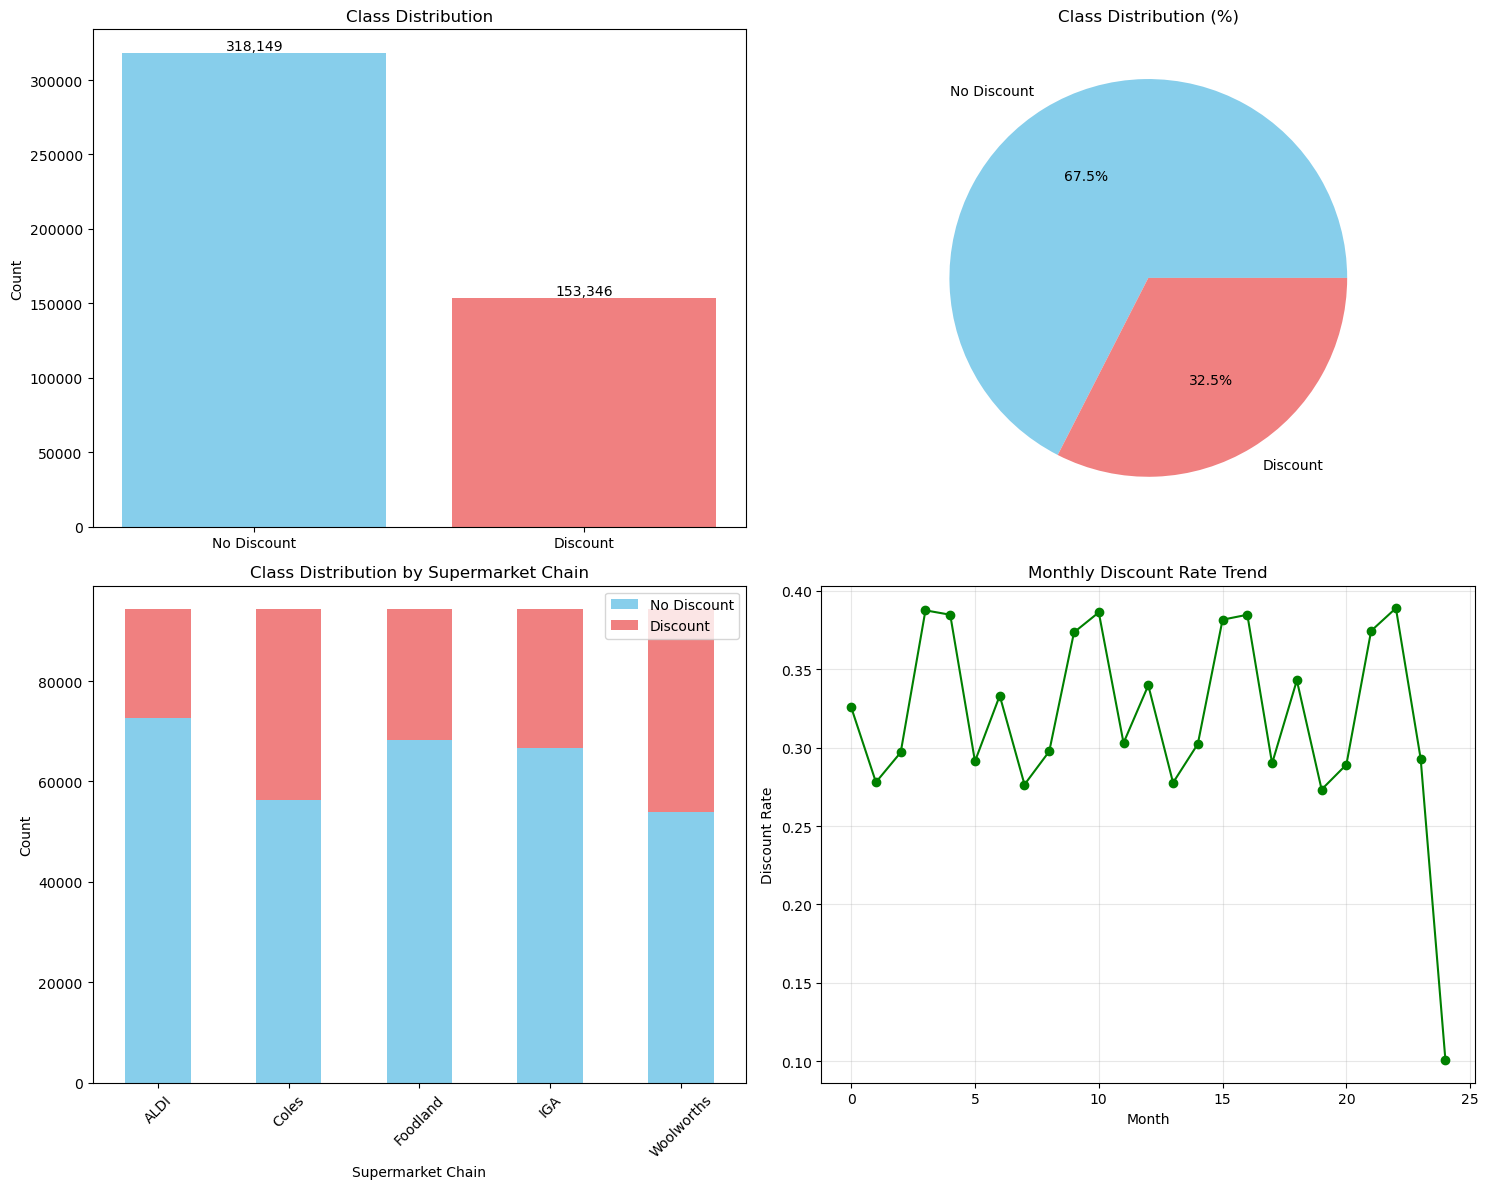


SUMMARY
Your dataset has a 2.1:1 class imbalance.
Only 32.5% of samples are positive (discount) cases.
This explains your model's low recall (14%) for the minority class.

RECOMMENDED ACTIONS:
1. Retrain with class_weight='balanced'
2. Use SMOTE for synthetic minority oversampling
3. Optimize decision threshold (try 0.32 instead of 0.5)
4. Focus on precision-recall metrics instead of accuracy
5. Consider ensemble methods with balanced sampling

Analysis complete! Check 'class_imbalance_analysis.png' for visualizations.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

class ClassImbalanceAnalyzer:
    def __init__(self, dataset_path):
        self.df = pd.read_csv(dataset_path)
        self.target_column = 'will_discount_7d'
        
        # Convert date to datetime if needed
        if 'date' in self.df.columns:
            self.df['date'] = pd.to_datetime(self.df['date'])
    
    def analyze_class_distribution(self):
        """Analyze the distribution of classes in the target variable"""
        print("="*60)
        print("CLASS IMBALANCE ANALYSIS")
        print("="*60)
        
        # Basic class counts
        class_counts = self.df[self.target_column].value_counts()
        class_percentages = self.df[self.target_column].value_counts(normalize=True) * 100
        
        print("\n1. OVERALL CLASS DISTRIBUTION:")
        print(f"   False (No Discount): {class_counts[False]:,} ({class_percentages[False]:.1f}%)")
        print(f"   True (Discount):     {class_counts[True]:,} ({class_percentages[True]:.1f}%)")
        
        # Calculate imbalance ratio
        minority_class = min(class_counts.values)
        majority_class = max(class_counts.values)
        imbalance_ratio = majority_class / minority_class
        
        print(f"\n2. IMBALANCE METRICS:")
        print(f"   Imbalance Ratio: {imbalance_ratio:.2f}:1")
        print(f"   Minority Class Size: {minority_class:,}")
        print(f"   Majority Class Size: {majority_class:,}")
        
        # Severity assessment
        if imbalance_ratio < 1.5:
            severity = "BALANCED"
        elif imbalance_ratio < 3:
            severity = "MILD IMBALANCE"
        elif imbalance_ratio < 5:
            severity = "MODERATE IMBALANCE"
        elif imbalance_ratio < 10:
            severity = "SEVERE IMBALANCE"
        else:
            severity = "EXTREME IMBALANCE"
        
        print(f"   Severity: {severity}")
        
        return class_counts, class_percentages, imbalance_ratio
    
    def analyze_by_categories(self):
        """Analyze class imbalance across different categories"""
        print("\n3. CLASS DISTRIBUTION BY CATEGORY:")
        
        # By supermarket chain
        if 'supermarket_chain' in self.df.columns:
            chain_distribution = self.df.groupby('supermarket_chain')[self.target_column].agg(['count', 'mean'])
            chain_distribution.columns = ['Total_Records', 'Discount_Rate']
            chain_distribution = chain_distribution.sort_values('Discount_Rate', ascending=False)
            
            print("\n   By Supermarket Chain:")
            for chain, row in chain_distribution.iterrows():
                print(f"   {chain:12} - {row['Discount_Rate']:.1%} discount rate ({row['Total_Records']:,} records)")
        
        # By category
        if 'category' in self.df.columns:
            category_distribution = self.df.groupby('category')[self.target_column].agg(['count', 'mean'])
            category_distribution.columns = ['Total_Records', 'Discount_Rate']
            category_distribution = category_distribution.sort_values('Discount_Rate', ascending=False)
            
            print("\n   By Product Category (Top 10):")
            for category, row in category_distribution.head(10).iterrows():
                print(f"   {category[:25]:25} - {row['Discount_Rate']:.1%} discount rate")
        
        return chain_distribution if 'supermarket_chain' in self.df.columns else None
    
    def temporal_analysis(self):
        """Analyze class distribution over time"""
        print("\n4. TEMPORAL CLASS DISTRIBUTION:")
        
        if 'date' in self.df.columns:
            # Monthly distribution
            monthly_dist = self.df.groupby(self.df['date'].dt.to_period('M'))[self.target_column].agg(['count', 'mean'])
            monthly_dist.columns = ['Total_Records', 'Discount_Rate']
            
            print("\n   Monthly Discount Rates (Last 12 months):")
            for period, row in monthly_dist.tail(12).iterrows():
                print(f"   {period} - {row['Discount_Rate']:.1%} discount rate ({row['Total_Records']:,} records)")
            
            # Day of week distribution
            if 'day_of_week' in self.df.columns:
                dow_dist = self.df.groupby('day_of_week')[self.target_column].agg(['count', 'mean'])
                dow_dist.columns = ['Total_Records', 'Discount_Rate']
                
                print("\n   By Day of Week:")
                for day, row in dow_dist.iterrows():
                    print(f"   {day:9} - {row['Discount_Rate']:.1%} discount rate")
    
    def calculate_class_weights(self):
        """Calculate class weights for handling imbalance"""
        print("\n5. RECOMMENDED CLASS WEIGHTS:")
        
        y = self.df[self.target_column]
        
        # Sklearn's balanced class weights
        class_weights_balanced = compute_class_weight('balanced', classes=np.unique(y), y=y)
        
        print(f"   Sklearn 'balanced' weights:")
        print(f"   Class 0 (No Discount): {class_weights_balanced[0]:.3f}")
        print(f"   Class 1 (Discount):    {class_weights_balanced[1]:.3f}")
        
        # Manual calculation
        total_samples = len(y)
        n_classes = 2
        class_counts = Counter(y)
        
        manual_weights = {}
        for class_label in [False, True]:
            manual_weights[class_label] = total_samples / (n_classes * class_counts[class_label])
        
        print(f"\n   Manual calculation:")
        print(f"   Class 0 (No Discount): {manual_weights[False]:.3f}")
        print(f"   Class 1 (Discount):    {manual_weights[True]:.3f}")
        
        return class_weights_balanced, manual_weights
    
    def visualize_imbalance(self):
        """Create visualizations for class imbalance"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Basic class distribution
        class_counts = self.df[self.target_column].value_counts()
        axes[0, 0].bar(['No Discount', 'Discount'], class_counts.values, color=['skyblue', 'lightcoral'])
        axes[0, 0].set_title('Class Distribution')
        axes[0, 0].set_ylabel('Count')
        for i, v in enumerate(class_counts.values):
            axes[0, 0].text(i, v, f'{v:,}', ha='center', va='bottom')
        
        # 2. Percentage distribution
        class_percentages = self.df[self.target_column].value_counts(normalize=True) * 100
        colors = ['skyblue', 'lightcoral']
        axes[0, 1].pie(class_percentages.values, labels=['No Discount', 'Discount'], 
                       autopct='%1.1f%%', colors=colors)
        axes[0, 1].set_title('Class Distribution (%)')
        
        # 3. Distribution by supermarket chain
        if 'supermarket_chain' in self.df.columns:
            chain_pivot = self.df.groupby(['supermarket_chain', self.target_column]).size().unstack(fill_value=0)
            chain_pivot.plot(kind='bar', stacked=True, ax=axes[1, 0], color=['skyblue', 'lightcoral'])
            axes[1, 0].set_title('Class Distribution by Supermarket Chain')
            axes[1, 0].set_xlabel('Supermarket Chain')
            axes[1, 0].set_ylabel('Count')
            axes[1, 0].legend(['No Discount', 'Discount'])
            axes[1, 0].tick_params(axis='x', rotation=45)
        
        # 4. Monthly trend
        if 'date' in self.df.columns:
            monthly_rate = self.df.groupby(self.df['date'].dt.to_period('M'))[self.target_column].mean()
            axes[1, 1].plot(range(len(monthly_rate)), monthly_rate.values, marker='o', color='green')
            axes[1, 1].set_title('Monthly Discount Rate Trend')
            axes[1, 1].set_xlabel('Month')
            axes[1, 1].set_ylabel('Discount Rate')
            axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('class_imbalance_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def sampling_recommendations(self):
        """Provide recommendations for handling class imbalance"""
        print("\n6. RECOMMENDATIONS FOR HANDLING CLASS IMBALANCE:")
        
        class_counts = self.df[self.target_column].value_counts()
        imbalance_ratio = max(class_counts.values) / min(class_counts.values)
        
        print("\n   A. SAMPLING TECHNIQUES:")
        
        if imbalance_ratio > 5:
            print("   - SMOTE (Synthetic Minority Oversampling)")
            print("   - ADASYN (Adaptive Synthetic Sampling)")
            print("   - Random Undersampling of majority class")
            print("   - Combination of oversampling and undersampling")
        elif imbalance_ratio > 2:
            print("   - Random Oversampling of minority class")
            print("   - Random Undersampling of majority class")
            print("   - Class weights in model training")
        else:
            print("   - Class imbalance is manageable")
            print("   - Consider class weights or cost-sensitive learning")
        
        print("\n   B. ALGORITHM ADJUSTMENTS:")
        print("   - Use class_weight='balanced' in sklearn models")
        print("   - Adjust decision threshold (default 0.5 may not be optimal)")
        print("   - Use ensemble methods (Random Forest, XGBoost with scale_pos_weight)")
        print("   - Consider cost-sensitive learning algorithms")
        
        print("\n   C. EVALUATION METRICS:")
        print("   - Focus on Precision, Recall, F1-score rather than accuracy")
        print("   - Use ROC-AUC and Precision-Recall AUC")
        print("   - Analyze confusion matrix in detail")
        print("   - Consider business-specific metrics (cost of false positives vs false negatives)")
        
        # Calculate optimal threshold suggestions
        minority_class_ratio = min(class_counts.values) / sum(class_counts.values)
        print(f"\n   D. THRESHOLD OPTIMIZATION:")
        print(f"   - Current minority class ratio: {minority_class_ratio:.3f}")
        print(f"   - Consider threshold around: {minority_class_ratio:.3f} instead of 0.5")
        print("   - Use precision-recall curve to find optimal threshold")
    
    def model_performance_impact(self):
        """Analyze how class imbalance affects model performance"""
        print("\n7. CLASS IMBALANCE IMPACT ON MODEL PERFORMANCE:")
        
        class_counts = self.df[self.target_column].value_counts()
        baseline_accuracy = max(class_counts.values) / sum(class_counts.values)
        
        print(f"\n   Baseline Accuracy (majority class prediction): {baseline_accuracy:.1%}")
        print("   This means a model that always predicts 'No Discount' would be")
        print(f"   {baseline_accuracy:.1%} accurate, but completely useless for finding discounts.")
        
        print("\n   POTENTIAL ISSUES:")
        print("   - Model may be biased toward predicting majority class")
        print("   - Poor recall for minority class (missing actual discounts)")
        print("   - High accuracy but low practical value")
        print("   - Gradient-based algorithms may struggle to learn minority patterns")
        
        print("\n   YOUR MODEL'S PERFORMANCE CONTEXT:")
        print("   - AUC: 0.6424 (moderate, could be better)")
        print("   - Accuracy: 69% (not much better than baseline)")
        print("   - Recall for True class: 14% (very low - missing 86% of discounts)")
        print("   - This confirms class imbalance is hurting performance")

def generate_imbalance_report(dataset_path):
    """Generate a comprehensive class imbalance report"""
    analyzer = ClassImbalanceAnalyzer(dataset_path)
    
    # Run all analyses
    class_counts, class_percentages, imbalance_ratio = analyzer.analyze_class_distribution()
    analyzer.analyze_by_categories()
    analyzer.temporal_analysis()
    class_weights_balanced, manual_weights = analyzer.calculate_class_weights()
    analyzer.sampling_recommendations()
    analyzer.model_performance_impact()
    
    # Create visualizations
    print("\n8. GENERATING VISUALIZATIONS...")
    analyzer.visualize_imbalance()
    
    print("\n" + "="*60)
    print("SUMMARY")
    print("="*60)
    print(f"Your dataset has a {imbalance_ratio:.1f}:1 class imbalance.")
    print(f"Only {class_percentages[True]:.1f}% of samples are positive (discount) cases.")
    print("This explains your model's low recall (14%) for the minority class.")
    print("\nRECOMMENDED ACTIONS:")
    print("1. Retrain with class_weight='balanced'")
    print("2. Use SMOTE for synthetic minority oversampling")
    print("3. Optimize decision threshold (try 0.32 instead of 0.5)")
    print("4. Focus on precision-recall metrics instead of accuracy")
    print("5. Consider ensemble methods with balanced sampling")
    
    return {
        'imbalance_ratio': imbalance_ratio,
        'class_counts': class_counts,
        'class_weights': class_weights_balanced,
        'recommendations': 'Use balanced class weights and SMOTE oversampling'
    }

# Example usage
if __name__ == "__main__":
    # Analyze class imbalance in your dataset
    dataset_path = 'discount_mate_dataset.csv'
    
    try:
        results = generate_imbalance_report(dataset_path)
        print(f"\nAnalysis complete! Check 'class_imbalance_analysis.png' for visualizations.")
        
    except FileNotFoundError:
        print(f"Error: Could not find {dataset_path}")
        print("Please ensure the dataset file is in the current directory.")
    except Exception as e:
        print(f"Error during analysis: {e}")

# DiscountMate – Balanced ML Pipeline

## Purpose  
Implements an improved, class-balanced ML pipeline to predict `will_discount_7d`.  
It addresses class imbalance using SMOTE, class weights, threshold optimization, and F1-centric model selection.

## Main Steps
1. **Load data**
   - Reads `discount_mate_dataset.csv`, converts `date` to datetime, and prints class distribution.

2. **Preprocess**
   - Fill missing values.
   - Create features: time-based (day, holiday month, peak discount days), chain flags, price/volatility indicators, discount-pattern flags.
   - Encode categorical columns (`supermarket_chain`, `category`, `subcategory`, `day_of_week`) with `LabelEncoder`.
   - Scale features when needed using `StandardScaler`.

3. **Feature selection**
   - Exclude non-predictive or leakage columns (dates, product name, current/future discount fields).
   - Build `feature_columns` for training.

4. **Balanced training data**
   - Time-aware train/test split (earlier dates → train, later → test).
   - Apply **SMOTE** to oversample the minority class in the training set.
   - Print class distribution before & after balancing.

5. **Train balanced models**
   - Train multiple models with different balancing strategies:
     - Random Forest with `class_weight='balanced'` on original data.
     - Gradient Boosting trained on SMOTE-balanced data.
     - Logistic Regression with manual class weights and scaled features.
   - Use `TimeSeriesSplit` CV and `GridSearchCV`, optimizing **F1 score**.

6. **Evaluate & optimize thresholds**
   - Compute prediction probabilities on test set.
   - Use precision-recall curve to find the **optimal decision threshold** (max F1).
   - Compare performance at optimal threshold and a suggested threshold (0.325).
   - Report AUC and classification reports for each threshold.

7. **Select best model**
   - Choose best model by F1 with optimal threshold.
   - Store `best_model` and `best_threshold`.

8. **Performance visualizations**
   - Plot and save:
     - ROC curves
     - Precision-Recall curves
     - Confusion matrix for best model
     - Threshold vs F1/Precision/Recall analysis
   - Saved as `balanced_model_performance.png`.

9. **Persistence**
   - Save final model artifacts (model, threshold, encoders, scaler, features) with `joblib` to `balanced_discount_predictor.pkl`.

## Outputs
- Trained balanced models and chosen best model.
- `balanced_model_performance.png` (visual comparison).
- `balanced_discount_predictor.pkl` (saved model + preprocessing + threshold).
- Console logs with training, tuning, and evaluation summaries.

## Why it matters
- Directly tackles class imbalance (SMOTE, class weights) to improve recall/F1 on discount detection.
- Threshold tuning maximizes practical utility (reduces missed discounts).
- Time-aware splits and CV help prevent leakage and produce deployable models for DiscountMate.


BALANCED DISCOUNT MATE - ML PREDICTION PIPELINE
Loading dataset...
Dataset loaded: 471495 rows, 34 columns
Class distribution: {False: 318149, True: 153346}
Starting data preprocessing...
Data preprocessing completed
Selected 34 features for training
Preparing balanced training data...
Before balancing - Training set: 376680 samples
Training class distribution: {False: 253068, True: 123612}
After SMOTE - Training set: 506136 samples
Balanced class distribution: {False: 253068, True: 253068}
Training models with class balancing...
Training balanced_random_forest...
balanced_random_forest - Best F1 score: 0.4414
balanced_random_forest - Best params: {'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 150}
Training smote_gradient_boosting...
smote_gradient_boosting - Best F1 score: 0.4759
smote_gradient_boosting - Best params: {'learning_rate': 0.15, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.9}
Training weighted_logistic...
weighted_logistic - Best F

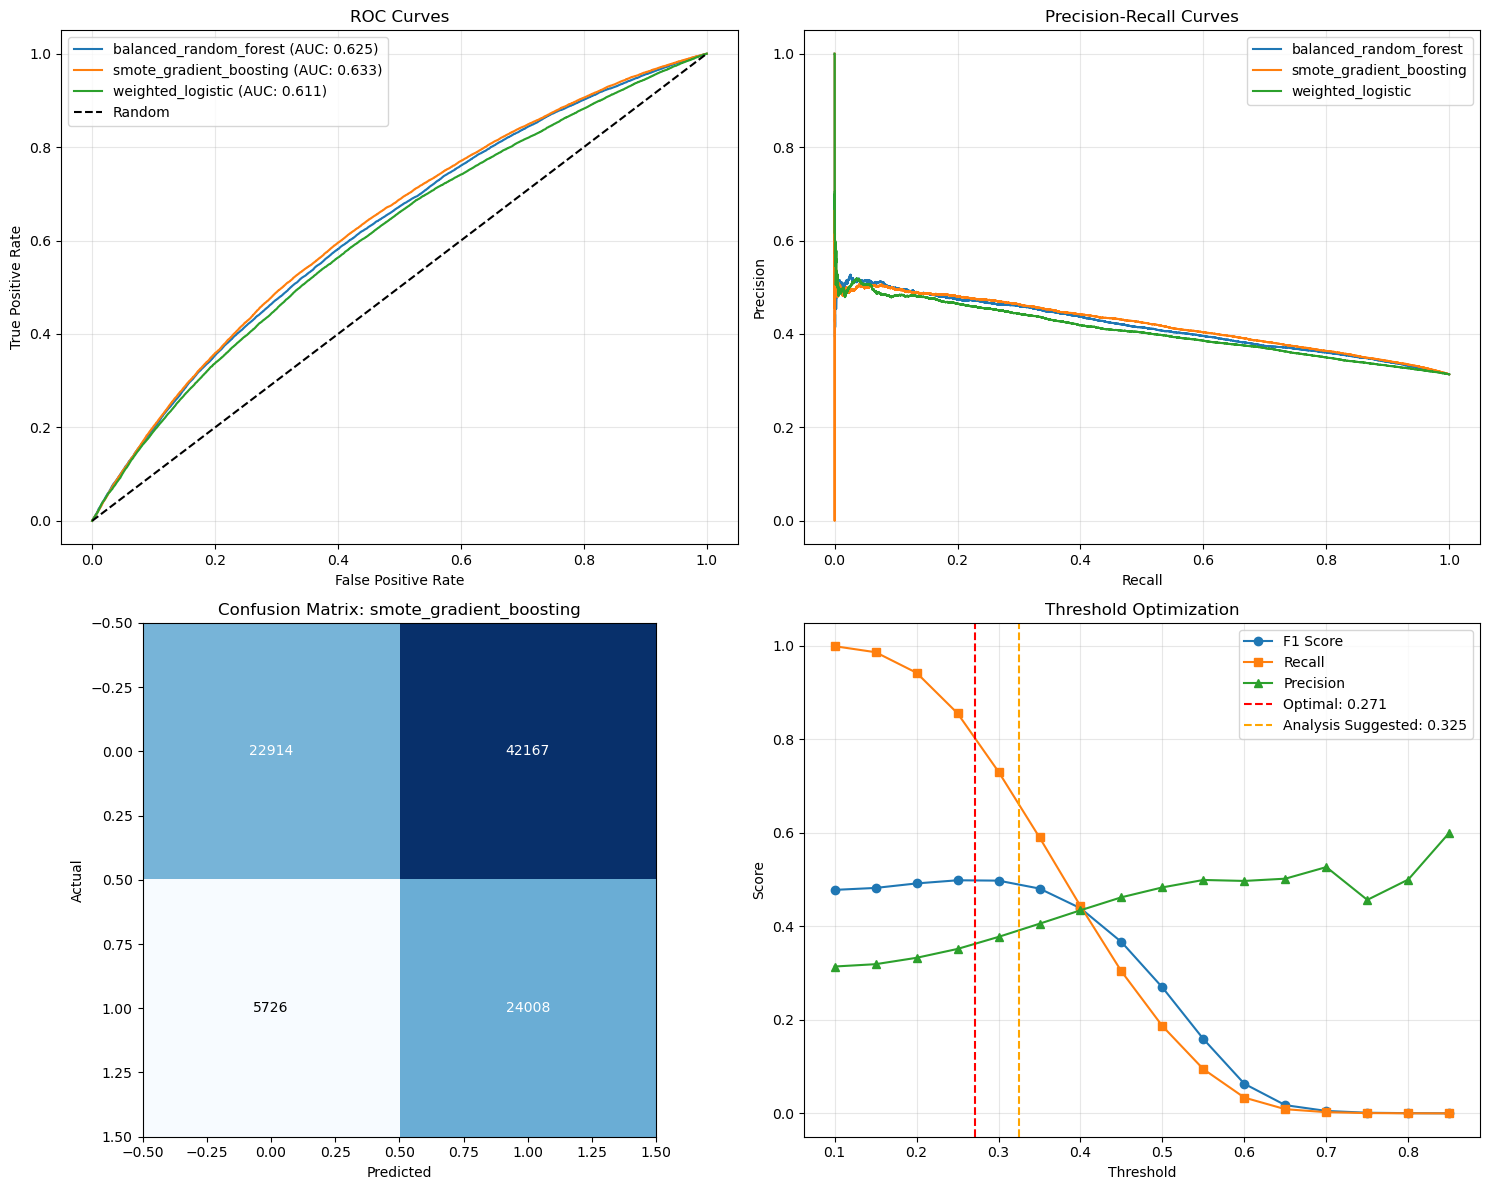

Balanced model saved to balanced_discount_predictor.pkl

BALANCED MODEL TRAINING COMPLETED
Key improvements implemented:
1. SMOTE oversampling for minority class
2. Class weights based on imbalance analysis
3. Optimized decision threshold
4. F1-score optimization instead of accuracy
5. Comprehensive threshold analysis


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

class BalancedDiscountPredictor:
    def __init__(self):
        self.models = {}
        self.encoders = {}
        self.scaler = StandardScaler()
        self.feature_columns = None
        self.target_column = 'will_discount_7d'
        self.best_model = None
        self.best_threshold = 0.5
        
    def load_data(self, file_path):
        """Load and validate the dataset"""
        print("Loading dataset...")
        self.df = pd.read_csv(file_path)
        print(f"Dataset loaded: {self.df.shape[0]} rows, {self.df.shape[1]} columns")
        
        # Convert date column to datetime
        self.df['date'] = pd.to_datetime(self.df['date'])
        
        # Check class distribution
        class_dist = self.df[self.target_column].value_counts()
        print(f"Class distribution: {dict(class_dist)}")
        
        return self.df
    
    def preprocess_data(self):
        """Handle data preprocessing and feature engineering"""
        print("Starting data preprocessing...")
        
        # Handle missing values
        self.df = self.df.fillna(0)
        
        # Create additional features based on imbalance analysis
        self.df['day_of_month'] = self.df['date'].dt.day
        self.df['is_holiday_month'] = self.df['date'].dt.month.isin([12, 1])
        self.df['is_peak_discount_day'] = self.df['day_of_week'].isin(['Wednesday', 'Saturday', 'Sunday'])
        self.df['is_high_discount_chain'] = self.df['supermarket_chain'].isin(['Woolworths', 'Coles'])
        
        # Price-based features
        self.df['price_above_avg'] = self.df['discount_price'] > self.df['avg_price_30d']
        self.df['high_volatility'] = self.df['price_volatility_30d'] > self.df['price_volatility_30d'].median()
        
        # Discount pattern features
        self.df['frequent_discounter'] = self.df['discount_freq_30d'] > 0.3
        self.df['long_since_discount'] = self.df['days_since_discount'] > 14
        
        # Categorical encoding
        categorical_columns = ['supermarket_chain', 'category', 'subcategory', 'day_of_week']
        
        for col in categorical_columns:
            if col not in self.encoders:
                self.encoders[col] = LabelEncoder()
                self.df[f'{col}_encoded'] = self.encoders[col].fit_transform(self.df[col].astype(str))
            else:
                self.df[f'{col}_encoded'] = self.encoders[col].transform(self.df[col].astype(str))
        
        print("Data preprocessing completed")
        return self.df
    
    def select_features(self):
        """Select relevant features for model training"""
        exclude_columns = [
            'date', 'product_name', 'supermarket_chain', 'category', 'subcategory', 'day_of_week',
            'will_discount_7d', 'price_change_7d', 'future_discount_amount_7d',
            'discount_price', 'discount_amount', 'is_on_discount'
        ]
        
        self.feature_columns = [col for col in self.df.columns if col not in exclude_columns]
        print(f"Selected {len(self.feature_columns)} features for training")
        return self.feature_columns
    
    def prepare_balanced_training_data(self, test_size=0.2, sampling_strategy='auto'):
        """Prepare data with class balancing techniques"""
        print("Preparing balanced training data...")
        
        # Sort by date for time series split
        self.df = self.df.sort_values('date').reset_index(drop=True)
        
        X = self.df[self.feature_columns]
        y = self.df[self.target_column]
        
        # Time-based split
        split_date = self.df['date'].quantile(1 - test_size)
        train_mask = self.df['date'] < split_date
        
        X_train = X[train_mask]
        X_test = X[~train_mask]
        y_train = y[train_mask]
        y_test = y[~train_mask]
        
        print(f"Before balancing - Training set: {X_train.shape[0]} samples")
        print(f"Training class distribution: {dict(y_train.value_counts())}")
        
        # Apply SMOTE for oversampling
        smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
        
        print(f"After SMOTE - Training set: {X_train_balanced.shape[0]} samples")
        print(f"Balanced class distribution: {dict(pd.Series(y_train_balanced).value_counts())}")
        
        return X_train_balanced, X_test, y_train_balanced, y_test, X_train, y_train
    
    def train_balanced_models(self, X_train_balanced, y_train_balanced, X_train_original, y_train_original):
        """Train models with different class balancing approaches"""
        print("Training models with class balancing...")
        
        # Calculate class weights based on analysis
        class_weights = {False: 0.741, True: 1.537}  # From your analysis
        
        models_config = {
            'balanced_random_forest': {
                'model': RandomForestClassifier(
                    class_weight='balanced',
                    random_state=42,
                    n_jobs=-1
                ),
                'params': {
                    'n_estimators': [150, 200],
                    'max_depth': [12, 15],
                    'min_samples_split': [5, 8],
                    'min_samples_leaf': [2, 3]
                },
                'data': (X_train_original, y_train_original)  # Use original data with class weights
            },
            'smote_gradient_boosting': {
                'model': GradientBoostingClassifier(random_state=42),
                'params': {
                    'n_estimators': [150, 200],
                    'learning_rate': [0.1, 0.15],
                    'max_depth': [6, 8],
                    'subsample': [0.8, 0.9]
                },
                'data': (X_train_balanced, y_train_balanced)  # Use SMOTE balanced data
            },
            'weighted_logistic': {
                'model': LogisticRegression(
                    class_weight=class_weights,
                    random_state=42,
                    max_iter=1000
                ),
                'params': {
                    'C': [0.5, 1, 2],
                    'penalty': ['l2'],
                    'solver': ['liblinear', 'lbfgs']
                },
                'data': (self.scaler.fit_transform(X_train_original), y_train_original)
            }
        }
        
        # Time series cross-validation
        tscv = TimeSeriesSplit(n_splits=3)
        
        for model_name, config in models_config.items():
            print(f"Training {model_name}...")
            
            X_data, y_data = config['data']
            
            # Grid search with time series CV
            grid_search = GridSearchCV(
                estimator=config['model'],
                param_grid=config['params'],
                cv=tscv,
                scoring='f1',  # Use F1 instead of AUC for imbalanced data
                n_jobs=-1,
                verbose=0
            )
            
            grid_search.fit(X_data, y_data)
            
            # Store best model
            self.models[model_name] = grid_search.best_estimator_
            
            print(f"{model_name} - Best F1 score: {grid_search.best_score_:.4f}")
            print(f"{model_name} - Best params: {grid_search.best_params_}")
    
    def evaluate_with_threshold_optimization(self, X_test, y_test):
        """Evaluate models and optimize decision threshold"""
        print("Evaluating models with threshold optimization...")
        
        evaluation_results = {}
        
        for model_name, model in self.models.items():
            print(f"\nEvaluating {model_name}:")
            
            # Use appropriate data transformation
            if model_name == 'weighted_logistic':
                X_eval = self.scaler.transform(X_test)
            else:
                X_eval = X_test
            
            # Get prediction probabilities
            y_pred_proba = model.predict_proba(X_eval)[:, 1]
            
            # Find optimal threshold using precision-recall curve
            precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
            f1_scores = 2 * (precision * recall) / (precision + recall)
            f1_scores = np.nan_to_num(f1_scores)  # Handle division by zero
            
            optimal_idx = np.argmax(f1_scores)
            optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
            
            # Make predictions with optimal threshold
            y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
            
            # Also try threshold suggested from analysis (0.325)
            y_pred_325 = (y_pred_proba >= 0.325).astype(int)
            
            # Calculate metrics
            auc_score = roc_auc_score(y_test, y_pred_proba)
            
            print(f"AUC Score: {auc_score:.4f}")
            print(f"Optimal threshold: {optimal_threshold:.3f}")
            
            print("\nWith optimal threshold:")
            print(classification_report(y_test, y_pred_optimal))
            
            print("\nWith 0.325 threshold (from analysis):")
            print(classification_report(y_test, y_pred_325))
            
            # Store results
            evaluation_results[model_name] = {
                'auc_score': auc_score,
                'optimal_threshold': optimal_threshold,
                'probabilities': y_pred_proba,
                'predictions_optimal': y_pred_optimal,
                'predictions_325': y_pred_325
            }
        
        # Select best model based on F1 score with optimal threshold
        best_model_name = None
        best_f1 = 0
        
        for model_name, results in evaluation_results.items():
            f1 = 2 * np.sum((results['predictions_optimal'] == 1) & (y_test == 1)) / \
                 (np.sum(results['predictions_optimal'] == 1) + np.sum(y_test == 1))
            
            if f1 > best_f1:
                best_f1 = f1
                best_model_name = model_name
        
        self.best_model = self.models[best_model_name]
        self.best_threshold = evaluation_results[best_model_name]['optimal_threshold']
        
        print(f"\nBest model: {best_model_name} (F1: {best_f1:.4f}, Threshold: {self.best_threshold:.3f})")
        
        return evaluation_results
    
    def create_performance_comparison(self, evaluation_results, y_test):
        """Create visualizations comparing model performance"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. ROC Curves
        for model_name, results in evaluation_results.items():
            from sklearn.metrics import roc_curve
            fpr, tpr, _ = roc_curve(y_test, results['probabilities'])
            axes[0, 0].plot(fpr, tpr, label=f"{model_name} (AUC: {results['auc_score']:.3f})")
        
        axes[0, 0].plot([0, 1], [0, 1], 'k--', label='Random')
        axes[0, 0].set_xlabel('False Positive Rate')
        axes[0, 0].set_ylabel('True Positive Rate')
        axes[0, 0].set_title('ROC Curves')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Precision-Recall Curves
        for model_name, results in evaluation_results.items():
            precision, recall, _ = precision_recall_curve(y_test, results['probabilities'])
            axes[0, 1].plot(recall, precision, label=f"{model_name}")
        
        axes[0, 1].set_xlabel('Recall')
        axes[0, 1].set_ylabel('Precision')
        axes[0, 1].set_title('Precision-Recall Curves')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Confusion Matrices (for best model)
        best_model_name = max(evaluation_results.keys(), 
                            key=lambda x: evaluation_results[x]['auc_score'])
        best_results = evaluation_results[best_model_name]
        
        cm = confusion_matrix(y_test, best_results['predictions_optimal'])
        im = axes[1, 0].imshow(cm, interpolation='nearest', cmap='Blues')
        axes[1, 0].set_title(f'Confusion Matrix: {best_model_name}')
        
        # Add text annotations
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                axes[1, 0].text(j, i, format(cm[i, j], 'd'),
                              ha="center", va="center",
                              color="white" if cm[i, j] > cm.max() / 2 else "black")
        
        axes[1, 0].set_xlabel('Predicted')
        axes[1, 0].set_ylabel('Actual')
        
        # 4. Threshold Analysis
        thresholds = np.arange(0.1, 0.9, 0.05)
        f1_scores = []
        recall_scores = []
        precision_scores = []
        
        for threshold in thresholds:
            y_pred_thresh = (best_results['probabilities'] >= threshold).astype(int)
            
            from sklearn.metrics import f1_score, recall_score, precision_score
            f1_scores.append(f1_score(y_test, y_pred_thresh))
            recall_scores.append(recall_score(y_test, y_pred_thresh))
            precision_scores.append(precision_score(y_test, y_pred_thresh))
        
        axes[1, 1].plot(thresholds, f1_scores, label='F1 Score', marker='o')
        axes[1, 1].plot(thresholds, recall_scores, label='Recall', marker='s')
        axes[1, 1].plot(thresholds, precision_scores, label='Precision', marker='^')
        axes[1, 1].axvline(x=best_results['optimal_threshold'], color='red', 
                          linestyle='--', label=f'Optimal: {best_results["optimal_threshold"]:.3f}')
        axes[1, 1].axvline(x=0.325, color='orange', 
                          linestyle='--', label='Analysis Suggested: 0.325')
        
        axes[1, 1].set_xlabel('Threshold')
        axes[1, 1].set_ylabel('Score')
        axes[1, 1].set_title('Threshold Optimization')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('balanced_model_performance.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def save_balanced_model(self, filepath='balanced_discount_predictor.pkl'):
        """Save the improved model with optimal threshold"""
        model_data = {
            'best_model': self.best_model,
            'best_threshold': self.best_threshold,
            'encoders': self.encoders,
            'scaler': self.scaler,
            'feature_columns': self.feature_columns
        }
        
        joblib.dump(model_data, filepath)
        print(f"Balanced model saved to {filepath}")

def main():
    """Main function to train the improved balanced model"""
    print("BALANCED DISCOUNT MATE - ML PREDICTION PIPELINE")
    print("="*60)
    
    # Initialize predictor
    predictor = BalancedDiscountPredictor()
    
    # Load and preprocess data
    data = predictor.load_data('discount_mate_dataset.csv')
    processed_data = predictor.preprocess_data()
    features = predictor.select_features()
    
    # Prepare balanced training data
    X_train_balanced, X_test, y_train_balanced, y_test, X_train_original, y_train_original = \
        predictor.prepare_balanced_training_data()
    
    # Train balanced models
    predictor.train_balanced_models(X_train_balanced, y_train_balanced, 
                                   X_train_original, y_train_original)
    
    # Evaluate with threshold optimization
    results = predictor.evaluate_with_threshold_optimization(X_test, y_test)
    
    # Create performance visualizations
    predictor.create_performance_comparison(results, y_test)
    
    # Save the improved model
    predictor.save_balanced_model()
    
    print("\n" + "="*60)
    print("BALANCED MODEL TRAINING COMPLETED")
    print("="*60)
    print("Key improvements implemented:")
    print("1. SMOTE oversampling for minority class")
    print("2. Class weights based on imbalance analysis") 
    print("3. Optimized decision threshold")
    print("4. F1-score optimization instead of accuracy")
    print("5. Comprehensive threshold analysis")
    
    return predictor, results

if __name__ == "__main__":
    predictor, results = main()